<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [59]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [60]:
df1=df.drop(['year','clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'],axis=1)
aux=df1.describe()
df1

,desplazamiento,cilindros,co2,consumo_litros_milla
0,2.5,4.0,522.764706,0.222671
1,4.2,6.0,683.615385,0.291185
2,2.5,4.0,555.437500,0.236588
3,4.2,6.0,683.615385,0.291185
4,3.8,6.0,555.437500,0.236588
...,...,...,...,...
36786,1.0,3.0,244.000000,0.105150
36787,0.9,3.0,246.000000,0.108155
36788,0.9,3.0,255.000000,0.111336
36789,0.9,3.0,248.000000,0.108155


In [61]:
df1.desplazamiento=df1.desplazamiento.replace(np.nan, aux['desplazamiento']['mean'])
df1.cilindros=df1.cilindros.replace(np.nan, aux['cilindros']['mean'])
df1.co2.replace=df1.co2.replace(np.nan, aux['co2']['mean'])
df1.consumo_litros_milla=df1.consumo_litros_milla.replace(np.nan, aux['consumo_litros_milla']['mean'])

In [62]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1))
df1.columns=['desplazamiento','cilindros','co2','consumo_litros_milla']
df1

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878
36787,0.038462,0.071429,0.174919,0.090196
36788,0.038462,0.071429,0.182174,0.096886
36789,0.038462,0.071429,0.176532,0.090196


In [63]:
df2=df.drop(['desplazamiento','cilindros','co2','consumo_litros_milla'],axis=1)


In [64]:
df2=pd.get_dummies(df2, "clase_tipo")

In [65]:
df_procesado=pd.concat([df1,df2],axis=1)

## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [77]:
kmeans = KMeans(n_clusters=8,random_state=0)
kmeans.fit(df_procesado)
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

array([4, 4, 4, ..., 2, 2, 2])

In [92]:
cluster=pd.DataFrame(clusters)
cluster.columns=['cluster']
df_final=pd.concat([df_procesado,cluster],axis=1)

In [115]:
for i in range (0,8):
    aux=df_final[df_final.cluster==i]
    print('Promedio Desplazamiero para el grupo',i,'es' ,aux.desplazamiento.mean(),'y la moda del desplazamiento para el grupo', i,'es', float(aux.desplazamiento.mode()))
    print('Promedio Cilindros para el grupo',i,'es' ,aux.cilindros.mean(),'y la moda del cilindros para el grupo', i,'es', float(aux.cilindros.mode()))
    print('Promedio co2 para el grupo',i,'es' ,aux.co2.mean(),'y la moda del co2 para el grupo', i,'es', float(aux.co2.mode()))
    print('Promedio consumo_litros_milla para el grupo',i,'es' ,aux.consumo_litros_milla.mean(),'y la moda del consumo_litros_milla para el grupo', i,'es', float(aux.consumo_litros_milla.mode()))

Promedio Desplazamiero para el grupo 0 es 0.3545735588288847 y la moda del desplazamiento para el grupo 0 es 0.30769230769230765
Promedio Cilindros para el grupo 0 es 0.2807328605200967 y la moda del cilindros para el grupo 0 es 0.2857142857142857
Promedio co2 para el grupo 0 es 0.3715533995051795 y la moda del co2 para el grupo 0 es 0.31774911715031473
Promedio consumo_litros_milla para el grupo 0 es 0.301904828568002 y la moda del consumo_litros_milla para el grupo 0 es 0.24183006535947707
Promedio Desplazamiero para el grupo 1 es 0.33769816180774487 y la moda del desplazamiento para el grupo 1 es 0.24358974358974356
Promedio Cilindros para el grupo 1 es 0.25260273972601793 y la moda del cilindros para el grupo 1 es 0.14285714285714285
Promedio co2 para el grupo 1 es 0.3794369507449098 y la moda del co2 para el grupo 1 es 0.37460335738778855
Promedio consumo_litros_milla para el grupo 1 es 0.3085486227830306 y la moda del consumo_litros_milla para el grupo 1 es 0.30501089324618735
Pr

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [124]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,303973.000166
1,10,196891.041815
2,20,166571.198366
3,30,149033.718129
4,50,123828.168680


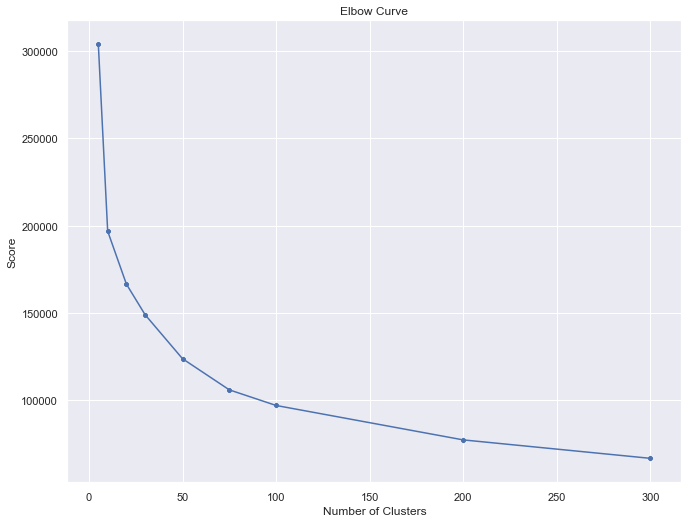

In [125]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

De este ultimo grafico podemos concluir que almenos a partir de los 100 clusters la curva tiende a tener un comportamiento mas asintotico sin embargo no tenemos hasta los 300 clusters una estabilizacion demaciado clara.